# # SENTIMENT ANALYSIS

In [1]:
# Textblob is used to determine the polarity of the sentence

# Import textblob
!pip install textblob
from textblob import TextBlob

In [2]:
text_1 = "The movie was terrible but the background score was excellent."
text_2 = "The food here tastes terrible."

# Determining the Polarity 
p_1 = TextBlob(text_1).sentiment.polarity
p_2 = TextBlob(text_2).sentiment.polarity

# Determining the Subjectivity
s_1 = TextBlob(text_1).sentiment.subjectivity
s_2 = TextBlob(text_2).sentiment.subjectivity

print("Polarity of Text 1 is", p_1)
print("Polarity of Text 2 is", p_2)
print("Subjectivity of Text 1 is", s_1)
print("Subjectivity of Text 2 is", s_2)

Polarity of Text 1 is 0.0
Polarity of Text 2 is -1.0
Subjectivity of Text 1 is 1.0
Subjectivity of Text 2 is 1.0


In [3]:
# VaderSentiment is used to analyse the intensity of the polarities

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
sentiment = SentimentIntensityAnalyzer()
text_1 = "The movie was terrible but the background score was excellent."
text_2 =  "The pizza tastes terrible."
sent_1 = sentiment.polarity_scores(text_1)
sent_2 = sentiment.polarity_scores(text_2)
print("Sentiment of text 1:", sent_1)
print("Sentiment of text 2:", sent_2)

Sentiment of text 1: {'neg': 0.136, 'neu': 0.53, 'pos': 0.334, 'compound': 0.6124}
Sentiment of text 2: {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}


# # In this case I Design a classification model that correctly predicts the polarity of the tweets provided in the dataset.

In [1]:
#Loading the Dataset
import pandas as pd

# Assigning the column names

colnames=['Target', 'Ids', 'Date', 'Flag','UserName','Text'] 
Twitter_Data = pd.read_csv(r"C:\Users\MOHANRAJ\Desktop\Projects\GUVI Final Project\Twiter Sentiment Analysis\twitter_new.csv",encoding='latin-1', names=colnames, header=None)
Twitter_Data

,Target,Ids,Date,Flag,UserName,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [2]:
# Splitting the data into trainig and testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Twitter_Data["Text"], Twitter_Data["Target"], test_size=0.3, random_state=5)

In [4]:
# Defining the class that transform http link and replace letters 

class RegexPreprocess(object):

    # Replace http links -> URL
    http_pat = '(https?:\/\/(?:www\.|(?!www))[^\s\.]+\.[^\s]{2,}|www\.[^\s]+\.[^\s]{2,})'
    
    # Replace repeated letters to two letters
    repeat_pat, repeat_repl = "(.)\\1\\1+",'\\1\\1'
    
    def __init__(self):
        pass
    
    def transform(self, X):
        is_pd_series = isinstance(X, pd.core.frame.Series)
        if not is_pd_series:
            pp_text = pd.Series(X)
        else:
            pp_text = X
        pp_text = pp_text.str.replace(pat = self.http_pat, repl = 'URL')
        pp_text.str.replace(pat = self.repeat_pat, repl = self.repeat_repl)
        return pp_text
        
    def fit(self, X, y=None):
        return self

In [8]:
# Designing the pipeline with RegexpTokenizer, TfidfVectorizer and LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
SentimentAnalysis_LogisticRegression = Pipeline([('regex_preprocess', RegexPreprocess()),
                            ('Tfid_Vector' , TfidfVectorizer(min_df = 100 , stop_words='english' , ngram_range = (1,3) , tokenizer = token.tokenize)),
                            ('LR', LogisticRegression(solver='lbfgs', max_iter=1600000))])

# Trainning the model
SentimentAnalysis_LogisticRegression.fit(X_train , Y_train)

C:\Users\MOHANRAJ\AppData\Local\Temp\ipykernel_2272\2010508002.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  pp_text = pp_text.str.replace(pat = self.http_pat, repl = 'URL')
C:\Users\MOHANRAJ\AppData\Local\Temp\ipykernel_2272\2010508002.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  pp_text.str.replace(pat = self.repeat_pat, repl = self.repeat_repl)


Pipeline(steps=[('regex_preprocess',
                 <__main__.RegexPreprocess object at 0x000001F7A32124C0>),
                ('Tfid_Vector',
                 TfidfVectorizer(min_df=100, ngram_range=(1, 3),
                                 stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('LR', LogisticRegression(max_iter=1600000))])

In [9]:
# To Check precision, recall, f1-score Prediction Score

from sklearn.metrics import classification_report
print(classification_report(Y_test,SentimentAnalysis_LogisticRegression.predict(X_test)))

C:\Users\MOHANRAJ\AppData\Local\Temp\ipykernel_2272\2010508002.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  pp_text = pp_text.str.replace(pat = self.http_pat, repl = 'URL')
C:\Users\MOHANRAJ\AppData\Local\Temp\ipykernel_2272\2010508002.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  pp_text.str.replace(pat = self.repeat_pat, repl = self.repeat_repl)


              precision    recall  f1-score   support

           0       0.80      0.76      0.77    240006
           4       0.77      0.81      0.79    239994

    accuracy                           0.78    480000
   macro avg       0.78      0.78      0.78    480000
weighted avg       0.78      0.78      0.78    480000



C:\Users\MOHANRAJ\AppData\Local\Temp\ipykernel_2272\2010508002.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  pp_text = pp_text.str.replace(pat = self.http_pat, repl = 'URL')
C:\Users\MOHANRAJ\AppData\Local\Temp\ipykernel_2272\2010508002.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  pp_text.str.replace(pat = self.repeat_pat, repl = self.repeat_repl)


Text(95.72222222222221, 0.5, 'Actual')

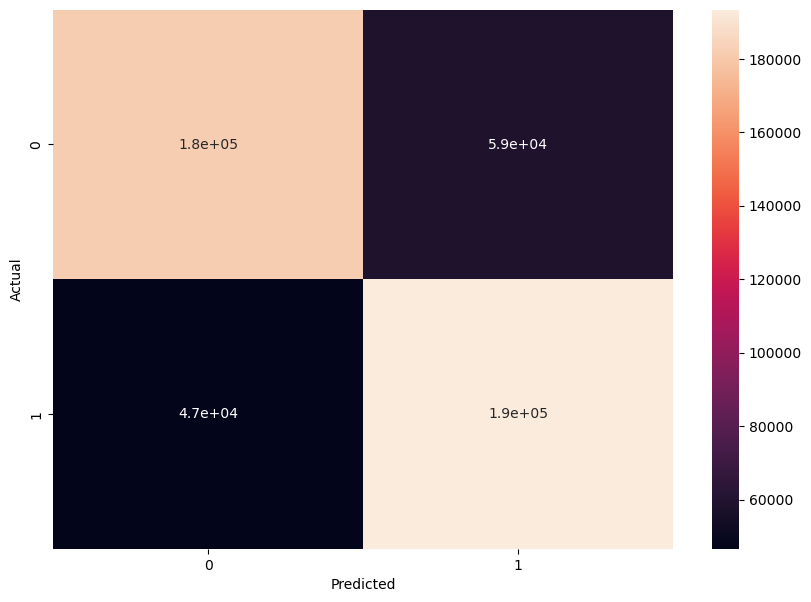

In [10]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

CM = confusion_matrix(Y_test,SentimentAnalysis_LogisticRegression.predict(X_test))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(CM,annot=True)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [11]:
# Saving the Model
import dill

file = open('TwitterComments_SentimentAnalysis_model.pkl','wb')
dill.dump(SentimentAnalysis_LogisticRegression, file)

# Closing the command
file.close()

In [15]:
import dill
# Opeaning the Saved Model
file = open('TwitterComments_SentimentAnalysis_model.pkl','rb')

# Loading the Model
Sentiment_Analysis_Model = dill.load(file)

# Predicting the polarity of some example from the saved model
txt = ["Ukrain is attcked by russia today with air missiles","Mars rover sends the first picture of mars today"]

for ch in txt:
    a = Sentiment_Analysis_Model.predict(ch)
    if a == 4:
        print(ch,": is a Positive Sentence")
    else:
        print(ch,": is a Negative Sentence")


# Closing the command
file.close()

Ukrain is attcked by russia today with air missiles : is a Negative Sentence
Mars rover sends the first picture of mars today : is a Positive Sentence


C:\Users\MOHANRAJ\AppData\Local\Temp\ipykernel_2272\2010508002.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  pp_text = pp_text.str.replace(pat = self.http_pat, repl = 'URL')
C:\Users\MOHANRAJ\AppData\Local\Temp\ipykernel_2272\2010508002.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  pp_text.str.replace(pat = self.repeat_pat, repl = self.repeat_repl)
